<a href="https://colab.research.google.com/github/yuhe6/Stat-430-Deep-Learning/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('./drive/MyDrive/dhz/CatAndDog', output="./drive/MyDrive/dhz/Output", seed=1, ratio=(.7, 0.3))

Copying files: 7520 files [1:19:14,  1.58 files/s]


# Data preperation

In [ ]:
# this is the pre-augmentated dataset
from torchvision import datasets
from torchvision import transforms
traindataset = datasets.ImageFolder(
    root="./drive/MyDrive/dhz/Output/train", 
    transform = transforms.ToTensor())
testdataset = datasets.ImageFolder(
    root="./drive/MyDrive/dhz/Output/val", 
    transform= transforms.ToTensor())
img, label = traindataset[0]
print(img.shape,label)

torch.Size([3, 400, 600]) 0


In [ ]:
print(traindataset.classes)
print(testdataset.classes)

['cat', 'dog']
['cat', 'dog']


In [ ]:
from torchvision.transforms.transforms import RandomRotation
from torchvision.transforms.functional_pil import rotate
# augmentation (Problem in this chunk, since the traindataset does not have uniform size as the argumented one.
# I make some changes as the following. The function, train_augmentation is used to flip instead of resizing.)
from torch.utils.data import ConcatDataset
# Augmentation = transforms.Compose([
#     transforms.Resize(size = (256, 256)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(45),
#     transforms.CenterCrop(10),
#     transforms.ColorJitter(brightness=.5, hue=.3),
#     transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
#     transforms.ToTensor()
# ])

Augmentation_Flip = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

Augmentation_Rotae = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.RandomRotation(45),
    transforms.ToTensor()
])

Augmentation_Crop = transforms.Compose([
    transforms.CenterCrop(100),
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])

Augmentation_Color = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ColorJitter(brightness=.5, hue=.3),
    transforms.ToTensor()
])

Augmentation_Blur = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
    transforms.ToTensor()
])

Resize_Only = transforms.Compose([
    transforms.Resize(size = (256, 256)),
    transforms.ToTensor()
])

Flip_dataset = datasets.ImageFolder(
    root="./drive/MyDrive/dhz/Output/train", 
    transform = Augmentation_Flip)

Rotae_dataset = datasets.ImageFolder(
    root="./drive/MyDrive/dhz/Output/train", 
    transform = Augmentation_Rotae)

Crop_dataset = datasets.ImageFolder(
    root="./drive/MyDrive/dhz/Output/train", 
    transform = Augmentation_Crop)

Color_dataset = datasets.ImageFolder(
    root="./drive/MyDrive/dhz/Output/train", 
    transform = Augmentation_Color)

Blur_dataset = datasets.ImageFolder(
    root="./drive/MyDrive/dhz/Output/train", 
    transform = Augmentation_Blur)

Train_Dataset = datasets.ImageFolder(
    root="./drive/MyDrive/dhz/Output/train", 
    transform = Resize_Only)

Concat_Flip = ConcatDataset([Train_Dataset, Flip_dataset])
Concat_Rotae = ConcatDataset([Train_Dataset, Rotae_dataset])
Concat_Crop = ConcatDataset([Train_Dataset, Crop_dataset])
Concat_Color = ConcatDataset([Train_Dataset, Color_dataset])
Concat_Blur = ConcatDataset([Train_Dataset, Blur_dataset])

Test_Dataset = datasets.ImageFolder(
    root="./drive/MyDrive/dhz/Output/val", 
    transform = Resize_Only)

In [ ]:
import torch
import torch.nn as nn
# Load Augmentated Train Data into a DataLoader
Flip_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Flip,
  batch_size = 8,
  shuffle = True,
  )

Rotate_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Rotae,
  batch_size = 8,
  shuffle = True,
  )

Crop_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Crop,
  batch_size = 8,
  shuffle = True,
  )

Color_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Color,
  batch_size = 8,
  shuffle = True,
  )

Blur_Train_Loader = torch.utils.data.DataLoader(
  dataset = Concat_Blur,
  batch_size = 8,
  shuffle = True,
  )

# Load Orignal Train Data into a DataLoader
Orignal_Train_Loader = torch.utils.data.DataLoader(
  dataset = Train_Dataset, 
  batch_size = 8,  
  shuffle = True  
)

# Load Test Data into a DataLoader
Animal_test_loader = torch.utils.data.DataLoader(
  dataset = Test_Dataset, 
  batch_size = 8,  # Make sure this matches with the training dimension
  shuffle = False  # Avoid shuffling.
)

In [ ]:
# Check the batch dimensions established with the loader.
for images, labels in Flip_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Rotate_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Crop_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Color_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Blur_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break


for images, labels in Orignal_Train_Loader:  
  print(f'Train Image Batch Shape: {images.shape}')
  print(f'Train Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

for images, labels in Animal_test_loader:  
  print(f'Test Image Batch Shape: {images.shape}')
  print(f'Test Image Label Shape: {labels.shape}')
  # Just get a single iteration, no need to check multiple values
  break

Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Train Image Batch Shape: torch.Size([8, 3, 256, 256])
Train Image Label Shape: torch.Size([8])
Test Image Batch Shape: torch.Size([8, 3, 256, 256])
Test Image Label Shape: torch.Size([8])


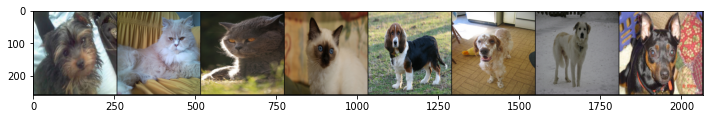

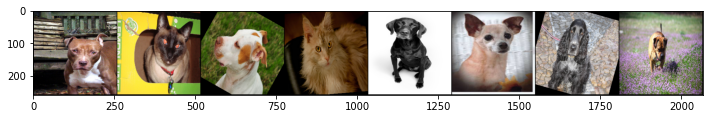

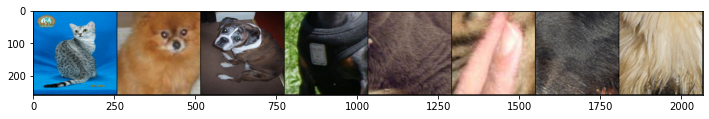

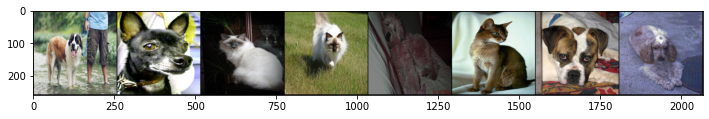

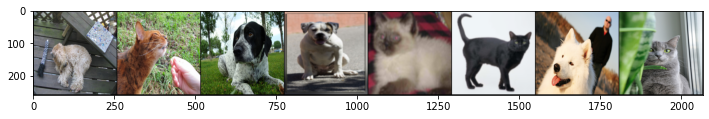

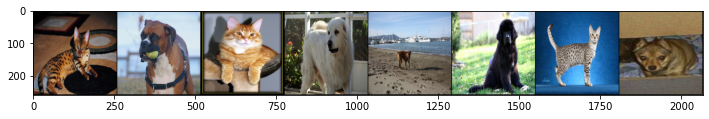

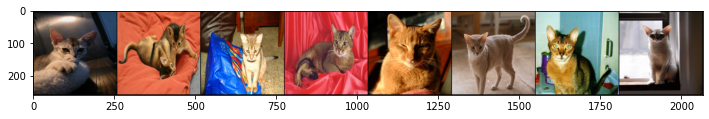

In [ ]:
# Construct a graph showing the data transformations
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
def display_pic(x):
    for images, labels in x:
        fig,ax = plt.subplots(figsize = (12,12))
        ax.imshow(make_grid(images,nrow=8).permute(1,2,0))
        break

display_pic(Flip_Train_Loader)
display_pic(Rotate_Train_Loader)
display_pic(Crop_Train_Loader)
display_pic(Color_Train_Loader)
display_pic(Blur_Train_Loader)
display_pic(Orignal_Train_Loader)
display_pic(Animal_test_loader)

# Model 1


In [ ]:
import torch.nn.functional as F 
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(1)
class Net(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3)
        # we use the maxpool multiple times, but define it once
        self.pool = nn.MaxPool2d(2,2)
        # in_channels = 6 because self.conv1 output 6 channel
        self.conv2 = nn.Conv2d(16, 32, 2) 
        # 5*5 comes from the dimension of the last convnet layer
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32*63*63, 1024) 
        self.fc2 = nn.Linear(1024, 64)
        self.fc3 = nn.Linear(64, 2)
        
    def forward(self, x): 
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = x.view(-1, 32*63*63)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # no activation on final layer 
        return x

torch.manual_seed(1)
Net_Flip = Net()
Net_Rotate = Net()
Net_Crop = Net()
Net_Color = Net()
Net_Blur = Net()
Net_Orignal = Net()

In [ ]:
# move the model to GPU for speed if available
if torch.cuda.is_available():
  Net_Flip.to('cuda')
  Net_Rotate.to('cuda')
  Net_Crop.to('cuda')
  Net_Color.to('cuda')
  Net_Blur.to('cuda')
  Net_Orignal.to('cuda')

## Flip

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Flip.parameters(), lr=0.01, momentum=0.8)

0 10 0.6706236064434051
0 20 0.6105853646993638
0 30 0.6180713921785355
0 40 0.6936713337898255
0 50 0.6387631505727768
0 60 0.6591645777225494
0 70 0.6608088374137878
0 80 0.5996761918067932
0 90 0.6430973768234253
0 100 0.6221528321504592
0 110 0.6118372052907943
0 120 0.6120105028152466
0 130 0.6686140477657319
0 140 0.6881495833396911
0 150 0.6486561894416809
0 160 0.6018472373485565
0 170 0.6622329354286194
0 180 0.6419779300689697
0 190 0.6499988704919815
0 200 0.6002430021762848
0 210 0.6682666093111038
0 220 0.6527342855930328
0 230 0.6169688194990158
0 240 0.6163869470357894
0 250 0.5481558918952942
0 260 0.587915375828743
0 270 0.6277743488550186
0 280 0.6350695341825485
0 290 0.6375249564647675
0 300 0.6245802372694016
0 310 0.6660382211208343
0 320 0.6487185627222061
0 330 0.6794967174530029
0 340 0.5957217574119568
0 350 0.7197809100151062
0 360 0.6546984434127807
0 370 0.6075774282217026
0 380 0.6341830879449845
0 390 0.5814599692821503
0 400 0.5149596154689788
0 410 0.61

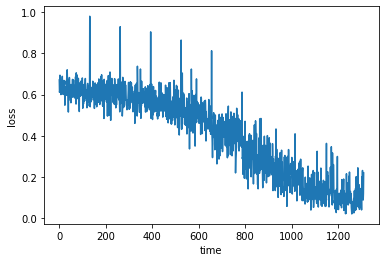

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []
torch.manual_seed(1)
for epoch in range(10):
    for i, data in enumerate(Flip_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Flip(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './drive/MyDrive/dhz/images/Net_Flip' + str(epoch) + '.pth'
    torch.save(Net_Flip.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Flip.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Flip_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Flip(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

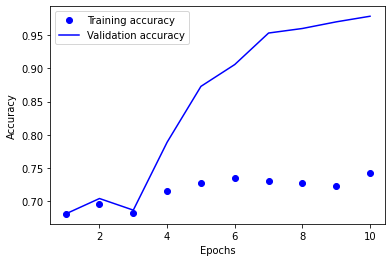

In [ ]:
epoch = range(1, len(test_accu) + 1)
plt.plot(epoch, test_accu, 'bo', label='Training accuracy')
plt.plot(epoch, train_accu, 'b', label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

In [ ]:
print(test_accu)
print(train_accu)

## Rotate

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Rotate.parameters(), lr=0.01, momentum=0.8)

0 10 0.6713364243507385
0 20 0.5988563597202301
0 30 0.6296974778175354
0 40 0.6905694663524627
0 50 0.6231623232364655
0 60 0.6513167083263397
0 70 0.6474660336971283
0 80 0.5850344061851501
0 90 0.6400515913963318
0 100 0.6249686300754547
0 110 0.6129617601633072
0 120 0.5967079430818558
0 130 0.6660985052585602
0 140 0.6838060617446899
0 150 0.6427224636077881
0 160 0.5997179508209228
0 170 0.6484751105308533
0 180 0.647544464468956
0 190 0.6473984181880951
0 200 0.6042122602462768
0 210 0.6685208290815353
0 220 0.6547769188880921
0 230 0.6240626543760299
0 240 0.5999855667352676
0 250 0.5290115296840667
0 260 0.5888998299837113
0 270 0.6216760128736496
0 280 0.6276510775089263
0 290 0.6353046119213104
0 300 0.6395753294229507
0 310 0.6610854744911194
0 320 0.6436437368392944
0 330 0.6758439242839813
0 340 0.5981118023395539
0 350 0.7249807298183442
0 360 0.6518403768539429
0 370 0.5935184925794601
0 380 0.6341170340776443
0 390 0.5891396880149842
0 400 0.5156949505209922
0 410 0.60

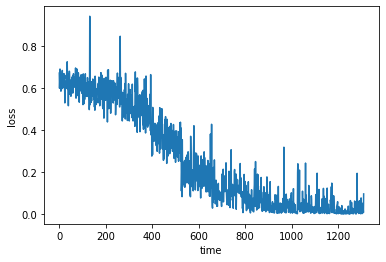

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []
torch.manual_seed(1)
for epoch in range(10):
    for i, data in enumerate(Rotate_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Rotate(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './drive/MyDrive/dhz/images/Net_Rotate' + str(epoch) + '.pth'
    torch.save(Net_Rotate.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Rotate.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Rotate_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Rotate(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

In [ ]:
epoch = range(1, len(test_accu) + 1)
plt.plot(epoch, test_accu, 'bo', label='Training loss')
plt.plot(epoch, train_accu, 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print(test_accu)
print(train_accu)

## Crop

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Crop.parameters(), lr=0.01, momentum=0.8)

0 10 0.6713364243507385
0 20 0.5988563597202301
0 30 0.6296974778175354
0 40 0.6905694663524627
0 50 0.6231623232364655
0 60 0.6513167083263397
0 70 0.6474660336971283
0 80 0.5850344061851501
0 90 0.6400515913963318
0 100 0.6249686300754547
0 110 0.6129617601633072
0 120 0.5967079430818558
0 130 0.6660985052585602
0 140 0.6838060617446899
0 150 0.6427224636077881
0 160 0.5997179508209228
0 170 0.6484751105308533
0 180 0.647544464468956
0 190 0.6473984181880951
0 200 0.6042122602462768
0 210 0.6685208290815353
0 220 0.6547769188880921
0 230 0.6240626543760299
0 240 0.5999855667352676
0 250 0.5290115296840667
0 260 0.5888998299837113
0 270 0.6216760128736496
0 280 0.6276510775089263
0 290 0.6353046119213104
0 300 0.6395753294229507
0 310 0.6610854744911194
0 320 0.6436437368392944
0 330 0.6758439242839813
0 340 0.5981118023395539
0 350 0.7249807298183442
0 360 0.6518403768539429
0 370 0.5935184925794601
0 380 0.6341170340776443
0 390 0.5891396880149842
0 400 0.5156949505209922
0 410 0.60

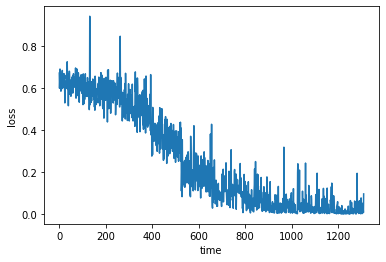

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []
torch.manual_seed(1)
for epoch in range(10):
    for i, data in enumerate(Crop_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Crop(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './drive/MyDrive/dhz/images/Net_Crop' + str(epoch) + '.pth'
    torch.save(Net_Crop.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Crop.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Crop_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Crop(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

In [ ]:
epoch = range(1, len(test_accu) + 1)
plt.plot(epoch, test_accu, 'bo', label='Training loss')
plt.plot(epoch, train_accu, 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print(test_accu)
print(train_accu)

## Color

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Color.parameters(), lr=0.01, momentum=0.8)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []
torch.manual_seed(1)
for epoch in range(10):
    for i, data in enumerate(Color_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Color(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './drive/MyDrive/dhz/images/Net_Color' + str(epoch) + '.pth'
    torch.save(Net_Color.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Color.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Color_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Color(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

In [ ]:
epoch = range(1, len(test_accu) + 1)
plt.plot(epoch, test_accu, 'bo', label='Training loss')
plt.plot(epoch, train_accu, 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print(test_accu)
print(train_accu)

## Blur

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Blur.parameters(), lr=0.01, momentum=0.8)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []
torch.manual_seed(1)
for epoch in range(10):
    for i, data in enumerate(Blur_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Blur(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './drive/MyDrive/dhz/images/Net_Blur' + str(epoch) + '.pth'
    torch.save(Net_Blur.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Blur.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Blur_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Blur(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

In [ ]:
epoch = range(1, len(test_accu) + 1)
plt.plot(epoch, test_accu, 'bo', label='Training loss')
plt.plot(epoch, train_accu, 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print(test_accu)
print(train_accu)

## Orignal

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Net_Orignal.parameters(), lr=0.01, momentum=0.8)

0 20 0.6364543795585632
0 30 0.6592007115483284
0 40 0.657692950963974
0 50 0.6646308571100235
0 60 0.7013850450515747
0 70 0.6639151632785797
0 80 0.5281125053763389
0 90 0.6625842273235321
0 100 0.58853939473629
0 110 0.6290063172578811
0 120 0.6557222574949264
0 130 0.5830373793840409
0 140 0.6793967545032501
0 150 0.6283962428569794
0 160 0.5308431342244149
0 170 0.7213038325309753
0 180 0.6272136569023132
0 190 0.567585465312004
0 200 0.659223523736
0 210 0.6294008553028106
0 220 0.5786964505910873
0 230 0.6115834712982178
0 240 0.6104558557271957
0 250 0.5659817636013031
0 260 0.6940258115530014
0 270 0.6543591558933258
0 280 0.706675124168396
0 290 0.6113641142845154
0 300 0.6363051652908325
0 310 0.6012929916381836
0 320 0.6480120360851288
0 330 0.6361777782440186
0 340 0.6149246513843536
0 350 0.5870751827955246
0 360 0.7192884624004364
0 370 0.6988504767417908
0 380 0.6638168185949326
0 390 0.655769807100296
0 400 0.6217881113290786
0 410 0.6975614488124847
0 420 0.6558536946

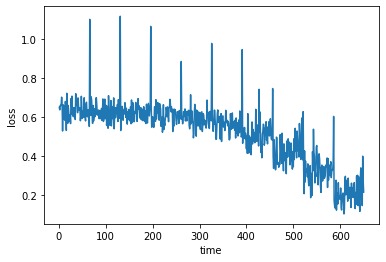

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
running_loss = 0 
printfreq = 10
l = []
t = []
k = 0
test_accu = []
train_accu = []
torch.manual_seed(1)
for epoch in range(10):
    for i, data in enumerate(Orignal_Train_Loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = Net_Orignal(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 

    total_test = 0  # keeps track of how many images we have processed 
    correct_test = 0  # keeps track of how many correct images our net predicts
    fname = './drive/MyDrive/dhz/images/Net_Orignal' + str(epoch) + '.pth'
    torch.save(Net_Orignal.state_dict(), fname)
    loaded_dict = torch.load(fname)
    Net_Orignal.load_state_dict(loaded_dict)
    with torch.no_grad():
      for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size()[0]
        correct_test += (predicted == labels).sum().item()
        
    test_accu.append(correct_test/total_test)

    total_train = 0  # keeps track of how many images we have processed 
    correct_train = 0  # keeps track of how many correct images our net predicts
    with torch.no_grad():
      for i, data in enumerate(Orignal_Train_Loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = Net_Orignal(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size()[0]
        correct_train += (predicted == labels).sum().item()
        
    train_accu.append(correct_train/total_train)
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()

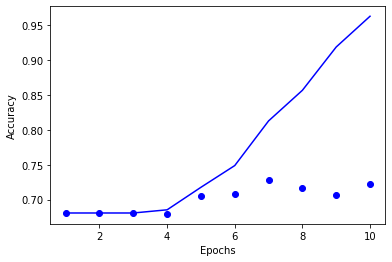

In [ ]:
epoch = range(1, len(test_accu) + 1)
plt.plot(epoch, test_accu, 'bo', label='Training loss')
plt.plot(epoch, train_accu, 'b', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print(test_accu)
print(train_accu)

[0.6808510638297872, 0.6808510638297872, 0.6808510638297872, 0.6795212765957447, 0.7047872340425532, 0.7087765957446809, 0.7287234042553191, 0.7163120567375887, 0.7070035460992907, 0.7225177304964538]
[0.6808510638297872, 0.6808510638297872, 0.6808510638297872, 0.6854103343465046, 0.7177051671732523, 0.7488601823708206, 0.8128799392097265, 0.8567629179331308, 0.9188829787234043, 0.9629559270516718]


# Model 2


In [ ]:
import torch.nn as nn
import torch.nn.functional as F 
class animalclassification(nn.Module):
    def __init__(self):
        
      super().__init__()
      self.conv1 = nn.Conv2d(3, 16, kernel_size= 3)
      self.pool1 = nn.MaxPool2d(2, 2)
      self.conv2 = nn.Conv2d(16, 32, kernel_size = 3)
      self.conv3 = nn.Conv2d(32, 32, kernel_size = 3)
      self.pool3 = nn.MaxPool2d(3, 3)
      self.fc1 = nn.Linear(32*41*41, 1024) 
      self.fc2 = nn.Linear(1024, 4)

    def forward(self, x):
      x = self.pool1(F.relu(self.conv1(x)))
      x = F.relu(self.conv2(x))
      x = self.pool3(F.relu(self.conv3(x)))
      x = x.view(-1, 32*41*41)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x

Mynet_Flip = animalclassification()
Mynet_Rotae = animalclassification()
Mynet_Crop = animalclassification()
Mynet_Color = animalclassification()
Mynet_Blur = animalclassification()
Mynet_Orignal = animalclassification()


In [ ]:
# move the model to GPU for speed if available
if torch.cuda.is_available():
  Mynet_Flip.to('cuda')
  Mynet_Rotae.to('cuda')
  Mynet_Crop.to('cuda')
  Mynet_Color.to('cuda')
  Mynet_Blur.to('cuda')
  Mynet_Orignal.to('cuda')

## Flip

## Rotate

## Crop

## Color

## Blur

## Orignal

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mynet1.parameters(), lr=0.005, momentum=0.9)

0 10 1.393644642829895
0 20 1.380130136013031
0 30 1.4016401410102843
0 40 1.386498177051544
0 50 1.3865121483802796
0 60 1.3824226617813111
0 70 1.3842312574386597
0 80 1.3839202523231506
0 90 1.3823843359947205
0 100 1.376287543773651
0 110 1.3625231862068177
0 120 1.3571169018745421
0 130 1.331001603603363
0 140 1.3036626338958741
1 10 1.4346614003181457
1 20 1.345516324043274
1 30 1.2969580292701721
1 40 1.3065342426300048
1 50 1.255824613571167
1 60 1.3265210509300231
1 70 1.1931064963340758
1 80 1.1668526768684386
1 90 1.2659585237503053
1 100 1.3001479268074037
1 110 1.2423734307289123
1 120 1.3134982347488404
1 130 1.2496347308158875
1 140 1.2521981954574586
2 10 1.3725826442241669
2 20 1.266936433315277
2 30 1.2292748630046844
2 40 1.2979086875915526
2 50 1.2940388321876526
2 60 1.1669192612171173
2 70 1.2930241227149963
2 80 1.29416081905365
2 90 1.1937915444374085
2 100 1.1176682353019713
2 110 1.2666802644729613
2 120 1.1933008670806884
2 130 1.2540464997291565
2 140 1.2794

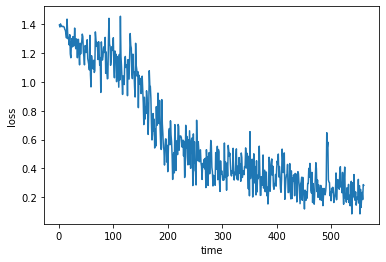

In [ ]:
# This part has a problem and I did not figure out why
running_loss = 0 
printfreq = 10
k = 0
l = []
t = []
for epoch in range(0):
    for i, data in enumerate(Augmentated_train_loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = mynet1(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show()            

In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mynet2.parameters(), lr=0.005, momentum=0.9)

0 10 1.3883075833320617
0 20 1.3894902110099792
0 30 1.4073866128921508
0 40 1.384412944316864
0 50 1.3830624103546143
0 60 1.3870259881019593
0 70 1.3897915959358216
1 10 1.5209957599639892
1 20 1.3819921016693115
1 30 1.3890024304389954
1 40 1.3790873408317565
1 50 1.3798030972480775
1 60 1.3771232128143311
1 70 1.3842045783996582
2 10 1.4936315178871156
2 20 1.3549999475479126
2 30 1.4117817401885986
2 40 1.3791223406791686
2 50 1.389115035533905
2 60 1.3676584959030151
2 70 1.3649308919906615
3 10 1.483166790008545
3 20 1.2534452617168426
3 30 1.3357409715652466
3 40 1.3503563761711121
3 50 1.3256990551948546
3 60 1.3287514209747315
3 70 1.2474187672138215
4 10 1.4207007884979248
4 20 1.3123453557491302
4 30 1.3009512543678283
4 40 1.1884179949760436
4 50 1.2585689663887023
4 60 1.3624196887016295
4 70 1.2398809313774108
5 10 1.2626079738140106
5 20 1.2274054408073425
5 30 1.1887953579425812
5 40 1.1221209466457367
5 50 1.270841860771179
5 60 1.2558680772781372
5 70 1.2337089538574

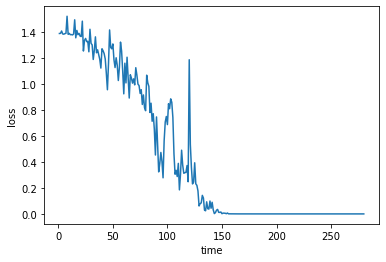

In [ ]:
# This part has a problem and I did not figure out why
running_loss = 0 
printfreq = 10
k = 0
l = []
t = []
for epoch in range(40):
    for i, data in enumerate(Orignal_train_loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = mynet2(inputs)  # forward pass 
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            k = k + 1
            l.append(running_loss / printfreq)
            t.append(k)
            running_loss = 0 
# plotting
l = np.array(l)
t = np.array(t)
plt.plot(t, l)
plt.xlabel("time")
plt.ylabel("loss")
plt.show() 

In [ ]:
fname = './drive/MyDrive/dhz/images/net256_1.pth'
torch.save(mynet1.state_dict(), fname)
loaded_dict = torch.load(fname)
mynet1.load_state_dict(loaded_dict)

fname = './drive/MyDrive/dhz/images/net256_2.pth'
torch.save(mynet2.state_dict(), fname)
loaded_dict = torch.load(fname)
mynet2.load_state_dict(loaded_dict)

<All keys matched successfully>

In [ ]:
total = 0  # keeps track of how many images we have processed 
correct = 0  # keeps track of how many correct images our net predicts
with torch.no_grad():
    for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = mynet1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size()[0]
        correct += (predicted == labels).sum().item()
    
print("Accuracy: ", correct/total)

Accuracy:  0.5230125523012552


In [ ]:
total = 0  # keeps track of how many images we have processed 
correct = 0  # keeps track of how many correct images our net predicts
with torch.no_grad():
    for i, data in enumerate(Animal_test_loader): 
        images, labels = data
        images = images.to('cuda')
        labels = labels.to('cuda')
        outputs = mynet2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size()[0]
        correct += (predicted == labels).sum().item()
    
print("Accuracy: ", correct/total)

Accuracy:  0.40585774058577406
